# Primjer 3. Analiza kretanja javnog duga USA-a

#### ChatGPT
Potrebna mi je Python skriptu koja analizira kretanje javnog duga SAD-a od 2000. do 2023. godine. Podatke treba preuzeti sa FRED baze podataka koristeći modul pandas_datareader, i ekonomski indikator koji opisjuje te podatke. Skripta treba da:
- Importuje potrebne module za rad skripte
- Definiše vremenski opseg analize (od 2000. do 2023. godine).
- Preuzme podatke o javnom dugu SAD-a.
- Prilagodi vremenske format radi lakše obrade.
- Agregira podatke na godišnjem nivou, uzimajući posljednju vrijednost za svaku godinu.
- Kreira linijski grafik koji prikazuje kretanje javnog duga kroz posmatrani period, sa:
    - Osa X koja prikazuje godine.
    - Osa Y koja prikazuje vrijednost javnog duga u hiljada milijardi USD.
- Doda naslov i mrežu na grafik za bolju preglednost.

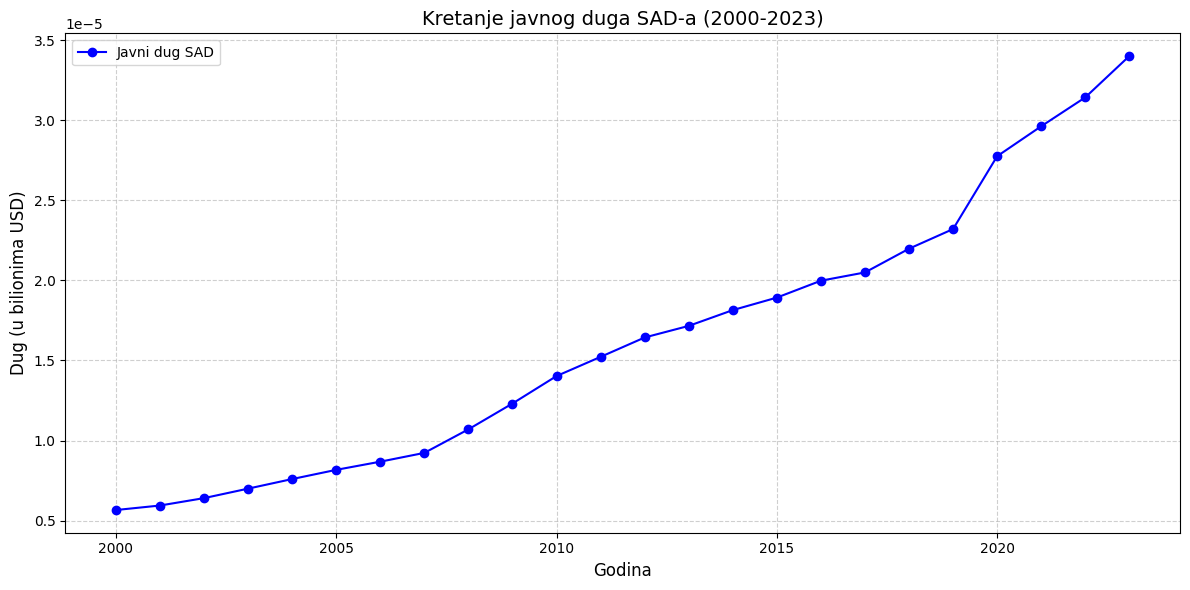

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
from pandas_datareader import data as web

# Definisanje vremenskog opsega analize
start_date = '2000-01-01'
end_date = '2023-12-31'

# Preuzimanje podataka o javnom dugu SAD-a sa FRED baze
debt = web.DataReader('GFDEBTN', 'fred', start_date, end_date)

# Konvertovanje vremenskih oznaka u datetime format radi lakše obrade
debt.index = pd.to_datetime(debt.index)

# Agregacija podataka na godišnjem nivou - posljednja vrijednost svake godine
annual_debt = debt.resample('YE').last()

# Kreiranje grafika
plt.figure(figsize=(12, 6))
plt.plot(annual_debt.index.year, annual_debt['GFDEBTN'] / 1e12, marker='o', linestyle='-', color='b', label='Javni dug SAD')

# Dodavanje naslova, osi i mreže
plt.title('Kretanje javnog duga SAD-a (2000-2023)', fontsize=14)
plt.xlabel('Godina', fontsize=12)
plt.ylabel('Dug (u bilionima USD)', fontsize=12)
plt.grid(True, linestyle='--', alpha=0.6)
plt.legend()
plt.tight_layout()
# Prikaz grafika
plt.show()

#### ChatGPT
Potrebna mi je Python skripta koja analizira kretanje cijena akcija kompanija Apple i Google, zajedno sa kretanjem javnog duga Sjedinjenih Američkih Država (SAD) u periodu od 2000. do 2023. godine. Skripta treba da:
- Importuje potrebne module za preuzimanje, obradu i prikaz podataka.
- Definiše vremenski opseg analize od 2000. do 2023. godine.
- Preuzme podatke o cijenama akcija Apple-a i Google-a koristeći Yahoo Finance API yfinance.
- Preuzme podatke o javnom dugu SAD-a sa FRED baze podataka koristeći odgovarajući indikator i pandas_datareader.
- Prilagodi podatke:
    - Preuzeti podatke sa download i WebReader
    - Konvertuje vremenske oznake za javni dug u odgovarajući format.
    - Agregira podatke o javnom dugu na mjesečni nivo, uzimajući posljednju dostupnu vrijednost svakog mjeseca.
- Spoji podatke o akcijama i javnom dugu u jedan skup podataka.
- Kreira uporedni grafik sa sljedećim karakteristikama:
    - Na lijevoj y-osi prikazuje kretanje cijena akcija Apple-a i Google-a u USD.
    - Na desnoj y-osi prikazuje kretanje javnog duga SAD-a u bilionima USD.
    - Dodaje legendu za svaku os.
- Doda naslov i mrežu na grafik za jasniji pregled parametara.


[*********************100%***********************]  2 of 2 completed


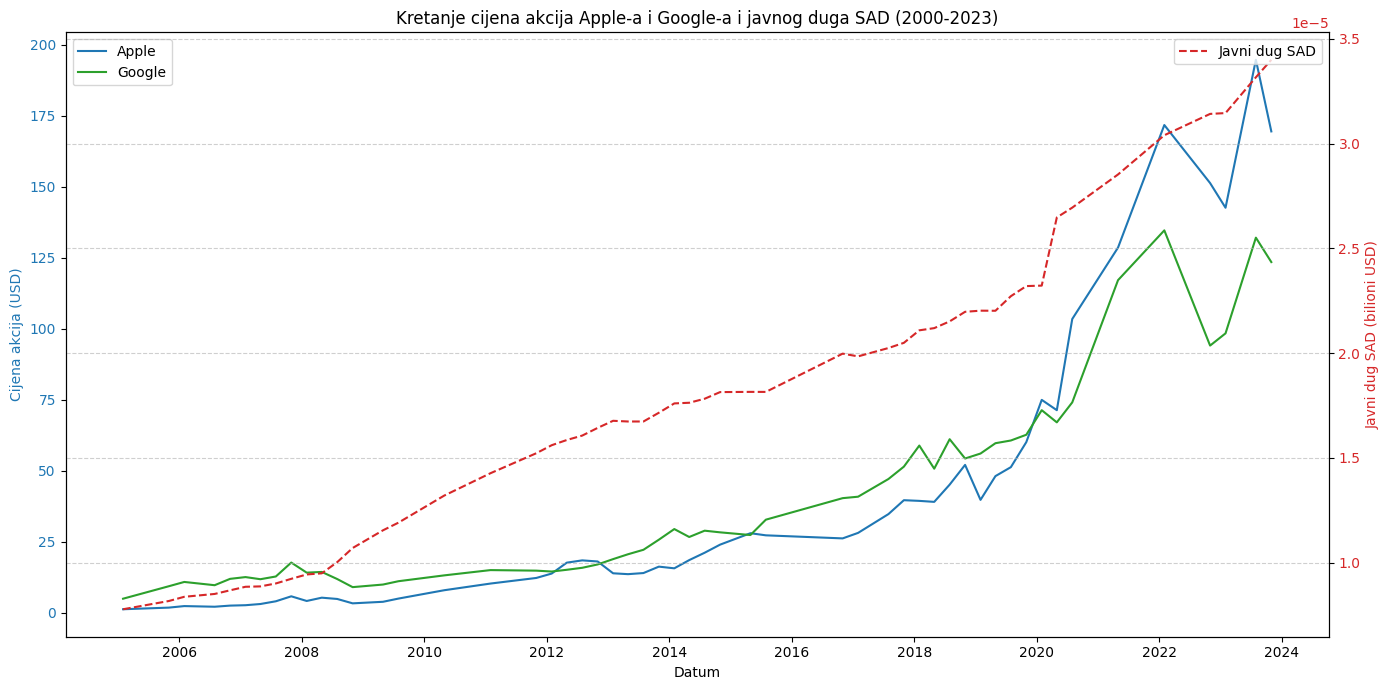

In [4]:
import pandas as pd
import matplotlib.pyplot as plt
import yfinance as yf
from pandas_datareader import data as web

# Definisanje vremenskog opsega analize
start_date = '2000-01-01'
end_date = '2023-12-31'
# Definisanje simbola kompanija
symbols = ['AAPL', 'GOOGL']
# Preuzimanje podataka o cijenama akcija koristeći Yahoo Finance API
stock_data = yf.download(symbols, start=start_date, end=end_date)['Close']
# Uklanjanje vremenske zone iz podataka
stock_data.index = stock_data.index.tz_localize(None)
# Preuzimanje podataka o javnom dugu SAD-a sa FRED baze podataka
debt_data = web.DataReader('GFDEBTN', 'fred', start_date, end_date)
# Konvertovanje vremenskih oznaka za javni dug u datetime format
debt_data.index = pd.to_datetime(debt_data.index)
# Agregacija podataka o javnom dugu na mjesečni nivo (uzimajući posljednju dostupnu vrijednost u mjesecu)
debt_monthly = debt_data.resample('ME').last()
# Spajanje podataka o cijenama akcija i javnom dugu u jedan DataFrame
data_combined = pd.concat([stock_data, debt_monthly], axis=1).dropna()
# Kreiranje uporednog grafika
fig, ax1 = plt.subplots(figsize=(14, 7))
# Prva y-osa (lijeva): cijene akcija
ax1.set_xlabel('Datum')
ax1.set_ylabel('Cijena akcija (USD)', color='tab:blue')
ax1.plot(data_combined.index, data_combined['AAPL'], label='Apple', color='tab:blue')
ax1.plot(data_combined.index, data_combined['GOOGL'], label='Google', color='tab:green')
ax1.tick_params(axis='y', labelcolor='tab:blue')
ax1.legend(loc='upper left')
# Druga y-osa (desna): javni dug
ax2 = ax1.twinx()  # Dvostruka y-osa
ax2.set_ylabel('Javni dug SAD (bilioni USD)', color='tab:red')
ax2.plot(data_combined.index, data_combined['GFDEBTN'] / 1e12, label='Javni dug SAD', color='tab:red', linestyle='--')
ax2.tick_params(axis='y', labelcolor='tab:red')
ax2.legend(loc='upper right')
# Dodavanje naslova i mreže
plt.title('Kretanje cijena akcija Apple-a i Google-a i javnog duga SAD (2000-2023)')
plt.grid(True, linestyle='--', alpha=0.6)
plt.tight_layout()
# Prikaz grafika
plt.show()